# Covid19PYColombia Module - Examples
covid19builderdf  is a module to construct a dataframe with covid19 data for Colombia
The class Covid19Builder provides a object from class Covid19PyColombia which has two methods:
- buildTotalDF() for retrieving historical Data
- buildByDate() for retrieving data of a specific date. By default return data of today.

Both functions take the limit parameter to set the max. number of expected rows


In [1]:
from covid19builderdf  import Covid19Builder

builder = Covid19Builder()
covid19 = builder.buildTotalDF(limit=10000)

PlotAll() shows a line plotting the total confirmed cases throughout the days”

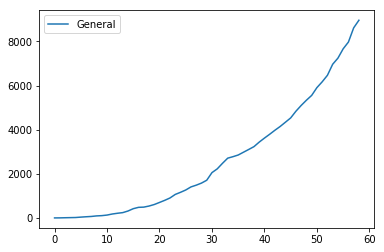

In [2]:
covid19.plotAll()

#### Plotting using the covid19pyColombia module.

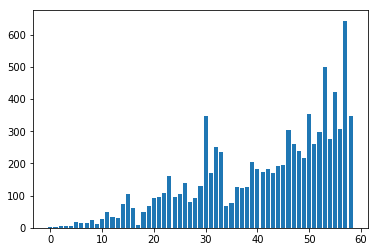

In [3]:
covid19.plotAll_Bar()

#### Plotting using the covid19pyworld module.
It is neccesary to dowload the file before. Repo: https://github.com/CSSEGISandData/COVID-19.git  
By contrast to covid19pycolombia module; covid19pyworld allows to plot data of any Country.

Processing file data/time_series_covid19_confirmed_global.csv
last date =>  5/5/20


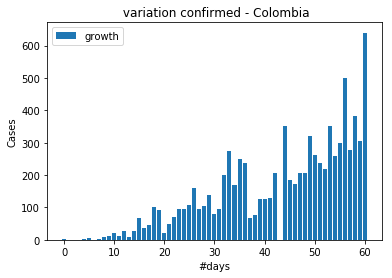

   total
0   8613
   last_value
0         640


In [5]:
import covid19pyworld as cw
cw.plotReportedCasesBar('confirmed','Colombia')

#### Below more examples using covid19pycolombia module.

In [6]:
print('Total: {} confirmed cases'.format(covid19.getAllData_Agg().tail(1).values[0]))

Total: 8959 confirmed cases


The method plotByDeptTopN(n) gets Top N Departments with most cases

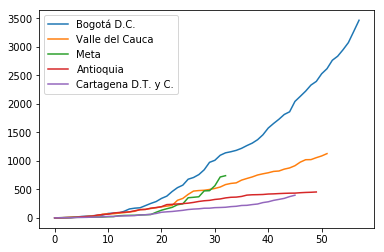

In [7]:
covid19.plotByDeptTopN(5)

The method plotByDept([]) takes a list of departments as parameter and makes a chart with lines for each department

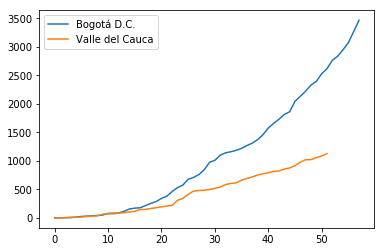

In [8]:
covid19.plotByDept([covid19.bogota,'Valle del Cauca',])

The method plotCities(n) gets Top N Cities with most cases

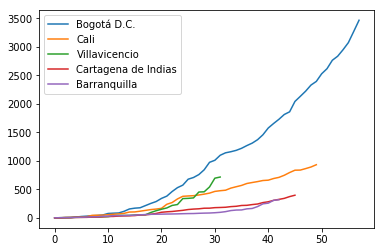

In [9]:
covid19.plotByCityTopN(5)

The method plotByCity([]) takes a list of cities as parameter and makes a chart with lines for each city

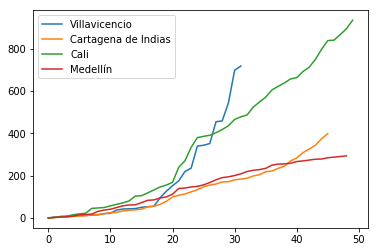

In [10]:
covid19.plotByCity(['Villavicencio','Cartagena de Indias','Cali','Medellín'])

Below there are additional methods to plot data about age, genre and health  

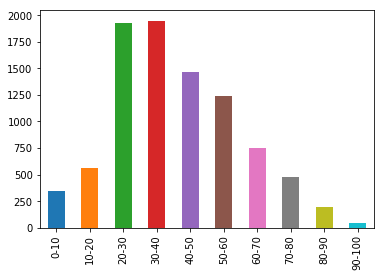

In [11]:
covid19.plotAge()

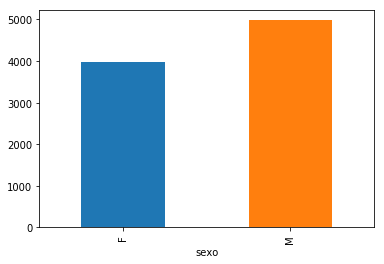

In [12]:
covid19.plotGenre()

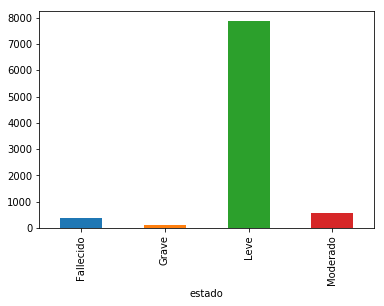

In [13]:
covid19.plotStatus()

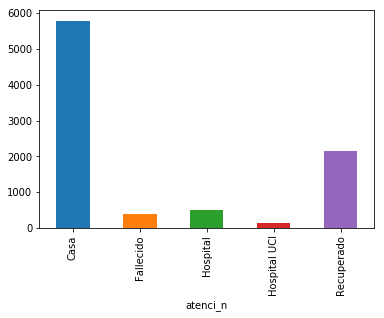

In [14]:
covid19.plotAttention()

Using the method builder.buildByDate() for fetching data of today

In [15]:
covid19_today  = builder.buildByDate()

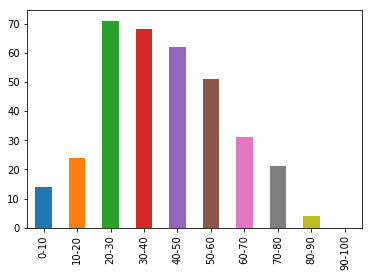

In [16]:
covid19_today.plotAge()

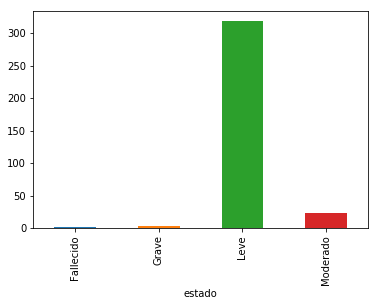

In [17]:
covid19_today.plotStatus()

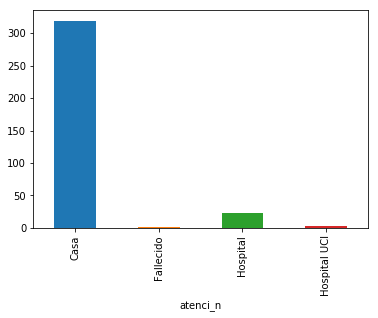

In [18]:
covid19_today.plotAttention()

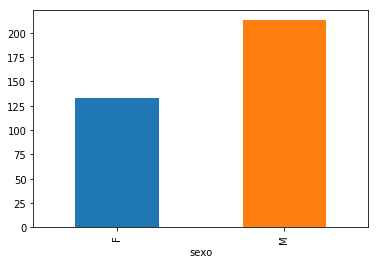

In [19]:
covid19_today.plotGenre()

In [20]:
len(covid19_today.df)

346

In [21]:
dir(covid19_today)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'bogota',
 'df',
 'getDataByAge',
 'getDataByAttention',
 'getDataByCity',
 'getDataByDept',
 'getDataByGenre',
 'getDataByStatus',
 'getDataCities',
 'getDataDepts',
 'plotAge',
 'plotAttention',
 'plotCities',
 'plotDepts',
 'plotGenre',
 'plotStatus']

In [22]:
covid19_today.getDataByAttention()

atenci_n
Casa            319
Fallecido         1
Hospital         23
Hospital UCI      3
Name: id_de_caso, dtype: int64

In [23]:
ps = covid19.df.groupby(['atenci_n']).count()['edad']

In [24]:
s = sum(ps)
ps.map(lambda x: (x,x*100/s))

atenci_n
Casa             (5788, 64.60542471257953)
Fallecido         (397, 4.431298135952673)
Hospital          (498, 5.558656100011162)
Hospital UCI      (123, 1.372921084942516)
N/A              (5, 0.055809800200915284)
Recuperado      (2148, 23.975890166313203)
Name: edad, dtype: object

In [25]:
covid19_today.getDataDepts()

departamento
Bolívar                  1
Buenaventura D.E.        1
Cundinamarca             1
Córdoba                  1
Risaralda                1
Caldas                   3
Chocó                    3
Antioquia                5
Nariño                   6
Barranquilla D.E.        9
Meta                    23
Cartagena D.T. y C.     24
Atlántico               29
Valle del Cauca         41
Bogotá D.C.            198
Name: id_de_caso, dtype: int64

In [26]:
covid19_today.getDataByDept('Boyacá')

Series([], dtype: int64)

In [27]:
covid19_today.df[covid19_today.df.departamento == 'Cundinamarca']

,atenci_n,ciudad_de_ubicaci_n,codigo_divipola,departamento,edad,estado,fecha_de_muerte,fecha_de_notificaci_n,fecha_diagnostico,fecha_recuperado,fecha_reporte_web,fis,id_de_caso,pa_s_de_procedencia,sexo,tipo
16,Casa,Soacha,25754,Cundinamarca,24,Leve,- -,2020-04-27T00:00:00.000,2020-05-06T00:00:00.000,- -,2020-05-06T00:00:00.000,Asintomático,8670,Colombia,M,En estudio
